In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HyP_2020_Terceros.csv')

df = df.rename(columns={
    'numero': 'id_hogar',
    'e26': 'sexo',
    'e27': 'edad',
    'e563': 'genero',
    'e29_6': 'ascendencia',
    'e30': 'parentesco',
    'pobpcoac': 'estado_laboral',
    'g126_1': 'sueldo'
    })

df['sexo'] = df['sexo'].astype('category')
df['nper'] = df['nper'].astype('category')
df['id_hogar'] = df['id_hogar'].astype('category')
df['edad'] = df['edad'].astype('int')

df = df[['id_hogar', 'sexo', 'edad', 'genero', 'ascendencia', 'parentesco', 'estado_laboral', 'nper', 'sueldo']]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145166 entries, 0 to 145165
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   id_hogar        145166 non-null  category
 1   sexo            145166 non-null  category
 2   edad            145166 non-null  int64   
 3   genero          145166 non-null  object  
 4   ascendencia     145166 non-null  object  
 5   parentesco      145166 non-null  object  
 6   estado_laboral  145166 non-null  object  
 7   nper            145166 non-null  category
 8   sueldo          145166 non-null  float64 
dtypes: category(3), float64(1), int64(1), object(4)
memory usage: 9.9+ MB


## Solo personas que cobran un sueldo

In [4]:
df = df[df['estado_laboral'].str.contains('Ocupados')]
df = df[df['edad'] > 14]
df = df[df['sueldo'] > 0]

df

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo
0,100,2.0,38,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,86000.0
1,100,1.0,39,Varón,Blanca,Esposo/a o compañero/a,Ocupados,2.0,80000.0
8,10001,1.0,62,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,56000.0
9,10001,2.0,39,Mujer,Afro o negra,Esposo/a o compañero/a,Ocupados,2.0,32000.0
15,10007,1.0,41,Varón,Asiática o amarilla,Jefe/a de hogar,Ocupados,1.0,15000.0
...,...,...,...,...,...,...,...,...,...
145159,9990,1.0,51,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,46000.0
145160,9991,2.0,34,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145161,9992,2.0,34,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145162,9993,1.0,51,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,48000.0


In [5]:
df['sueldo'].mode()

0    30000.0
dtype: float64

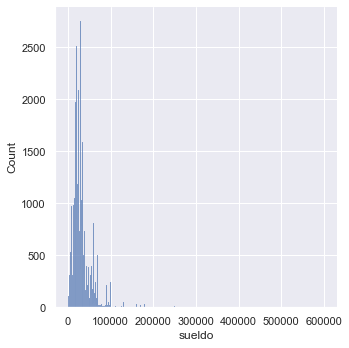

In [6]:
sns.displot(df['sueldo'])

In [7]:
quantil_99 = df['sueldo'].quantile(0.99)
print(quantil_99)

df_no_outliers = df.copy()[df['sueldo'] < quantil_99]

quartil_1 = df_no_outliers['sueldo'].quantile(0.25)
quartil_3 = df_no_outliers['sueldo'].quantile(0.75)

iqr =  quartil_3 - quartil_1

130000.0


In [8]:
df_no_outliers = df_no_outliers[df_no_outliers['sueldo'] < quartil_3 + 1.5 * iqr]

df_no_outliers = df_no_outliers[df_no_outliers['sueldo'] > quartil_1 - 1.5 * iqr]

df_no_outliers

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo
8,10001,1.0,62,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,56000.0
9,10001,2.0,39,Mujer,Afro o negra,Esposo/a o compañero/a,Ocupados,2.0,32000.0
15,10007,1.0,41,Varón,Asiática o amarilla,Jefe/a de hogar,Ocupados,1.0,15000.0
16,10007,2.0,35,Mujer,Asiática o amarilla,Esposo/a o compañero/a,Ocupados,2.0,35000.0
17,10007,1.0,21,Varón,Asiática o amarilla,Hijo/a solo del esposo/a compañero/a,Ocupados,3.0,15000.0
...,...,...,...,...,...,...,...,...,...
145159,9990,1.0,51,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,46000.0
145160,9991,2.0,34,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145161,9992,2.0,34,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145162,9993,1.0,51,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,48000.0


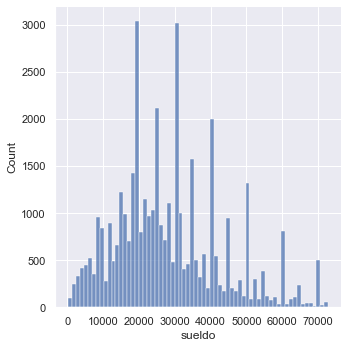

In [9]:
sns.displot(df_no_outliers['sueldo'])

In [10]:
print(df_no_outliers['edad'].min(), df_no_outliers['edad'].max())

15 84


[Text(0, 0, '20804'), Text(0, 0, '19658')]

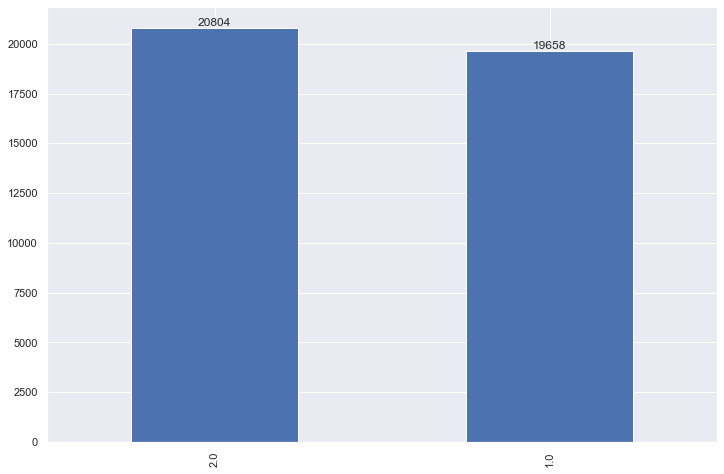

In [11]:
ax =df_no_outliers['sexo'].value_counts().plot(kind='bar')

ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='sexo', ylabel='sueldo'>

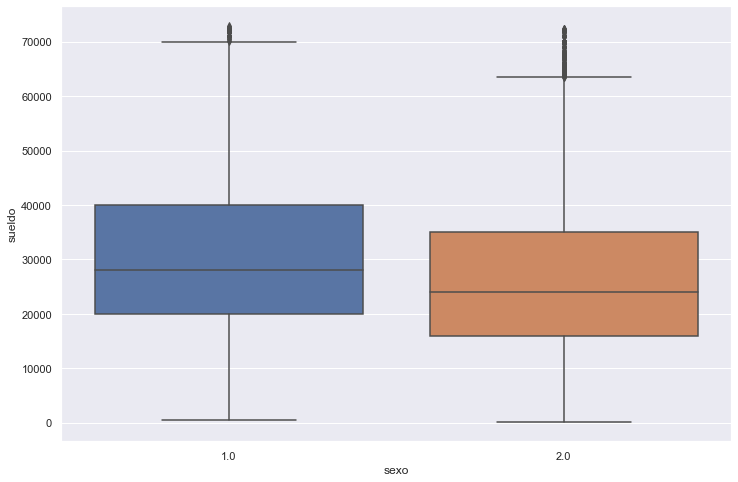

In [12]:
#Sexo y sueldo
sns.boxplot(data=df_no_outliers, x='sexo', y='sueldo')

<AxesSubplot:xlabel='edad', ylabel='sueldo'>

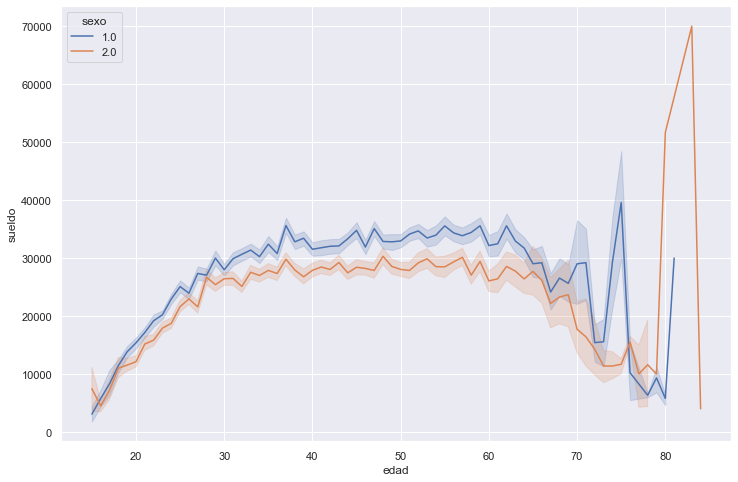

In [13]:
#Edad y sueldo
sns.lineplot(data=df_no_outliers, x='edad', y='sueldo',hue='sexo')
